# Train

**Import needed libraries**

In [36]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split



**Lose Function and Gradient Decent**

Text(0, 0.5, 'y')

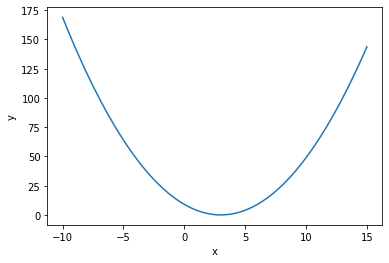

In [21]:
x = np.arange(-10, 15, 0.01)
y = (x-3)**2

plt.plot(x, y)
plt.xlabel('x'); plt.ylabel('y')

In [22]:
# Initialize at x=1
cur_x = 1 

# Learning rate (how much to adjust x each iteration)
rate = 0.05

# Maximum number of iterations
max_iters = 25

# Initialize interation counter
iters = 0

# Gradient of the function
grad = lambda x: 2*(x-3)

while iters < max_iters:
  # Set the previous x as the current
  prev_x = cur_x

  # Calculate the "new" current x with the gradient
  cur_x = prev_x - (rate * grad(prev_x))

  # Advance the iteration counter
  iters = iters+1
  print("Iteration {} - x value: {}.".format(iters, cur_x))

# Print out the final result
print("The local minimum occurs at", cur_x)

Iteration 1 - x value: 1.2.
Iteration 2 - x value: 1.38.
Iteration 3 - x value: 1.5419999999999998.
Iteration 4 - x value: 1.6877999999999997.
Iteration 5 - x value: 1.8190199999999999.
Iteration 6 - x value: 1.937118.
Iteration 7 - x value: 2.0434061999999997.
Iteration 8 - x value: 2.1390655799999996.
Iteration 9 - x value: 2.2251590219999997.
Iteration 10 - x value: 2.3026431198.
Iteration 11 - x value: 2.37237880782.
Iteration 12 - x value: 2.4351409270380002.
Iteration 13 - x value: 2.4916268343342.
Iteration 14 - x value: 2.54246415090078.
Iteration 15 - x value: 2.5882177358107024.
Iteration 16 - x value: 2.629395962229632.
Iteration 17 - x value: 2.6664563660066687.
Iteration 18 - x value: 2.6998107294060016.
Iteration 19 - x value: 2.7298296564654017.
Iteration 20 - x value: 2.7568466908188616.
Iteration 21 - x value: 2.7811620217369755.
Iteration 22 - x value: 2.8030458195632777.
Iteration 23 - x value: 2.82274123760695.
Iteration 24 - x value: 2.840467113846255.
Iteration 25

**Experimenting with batch size**

In [24]:
# Set the URL for the data location
data = 'data/pima-indians-diabetes.names.txt'

# Load the dataset
dataset = np.loadtxt(data, delimiter=',')

# Look at the size of the dataset
print("There are {} samples in this dataset".format(len(dataset)))

# Split into input (X) and output (y) variables
# (8 input columns, 1 target column)
X = dataset[:,0:8]
y = dataset[:,8]

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

There are 768 samples in this dataset


In [25]:
# Define batch sizes
size = 1

# Fit the model with different batch sizes
model.fit(X, y, epochs=100, batch_size=size, verbose=0)

# Evaluate the model
print('Model accuracy for batch size = {}: '.format(size), model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7383
Model accuracy for batch size = 1:  73.828125


In [26]:
# Release global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define batch sizes
size = 100

# Fit the model with different batch sizes
model.fit(X, y, epochs=100, batch_size=size, verbose=0)

# Evaluate the model
print('Model accuracy for batch size = {}: '.format(size), model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7135
Model accuracy for batch size = 100:  71.35416865348816


In [27]:
# Release global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Define batch sizes
size = len(X)

# Fit the model with different batch sizes
model.fit(X, y, epochs=100, batch_size=size, verbose=0)

# Evaluate the model
print('Model accuracy for batch size = {}: '.format(size), model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 911us/step - loss: 1.5288 - accuracy: 0.6380
Model accuracy for batch size = 768:  63.80208134651184


**Experimenting with learning rates**

In [29]:
# Set the URL for the data location
data = 'data/pima-indians-diabetes.names.txt'

# Load the dataset
dataset = np.loadtxt(data, delimiter=',')

# Look at the size of the dataset
print("There are {} samples in this dataset".format(len(dataset)))

# Split into input (X) and output (y) variables
# (8 input columns, 1 target column)
X = dataset[:,0:8]
y = dataset[:,8]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

There are 768 samples in this dataset


In [34]:
# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model with validation data
lr_low = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0,
                       validation_data=(X_test, y_test))

# Evaluate the model
print('Model accuracy for learning rate = 0.0001:', model.evaluate(X, y)[1]*100)

C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


24/24 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.6458
Model accuracy for learning rate = 0.0001: 64.58333134651184


In [35]:
# Release global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = SGD(lr=0.75)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model with different batch sizes
lr_high = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0,
                       validation_data=(X_test, y_test))

# Evaluate the model
print('Model accuracy for learning rate = 0.75:', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6510
Model accuracy for learning rate = 0.75: 65.10416865348816


In [43]:
# Create an empty list to append each DataFrame
learn_rates = []

# Loop through the history of each model and create a DataFrame
for model, result in zip([lr_low, lr_high], ["0.0001_", "0.75_"]):

  df = pd.DataFrame.from_dict(model.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learn_rates.append(df)

# Combine all the DataFrames
df = pd.concat(learn_rates, ignore_index=True)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,4.123405,0.614583,2.730403,0.557292,0,0.0001_
1,2.172411,0.524306,1.831988,0.531250,1,0.0001_
2,1.658513,0.512153,1.463236,0.510417,2,0.0001_
3,1.392331,0.532986,1.274116,0.489583,3,0.0001_
4,1.232915,0.536458,1.154461,0.494792,4,0.0001_


In [44]:
df[df.index.duplicated()]

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate


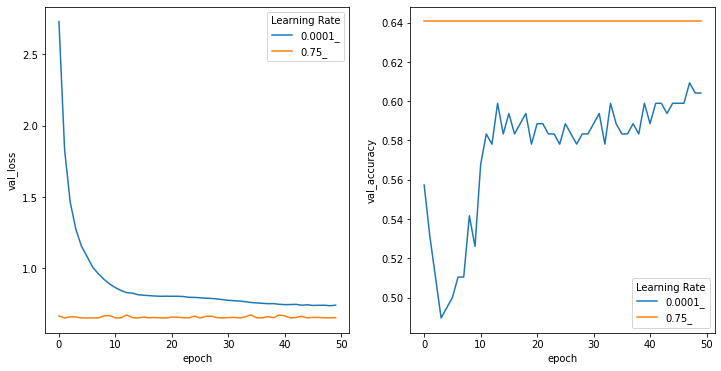

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df, ax=ax1)
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df, ax=ax2);